In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Binary input data for AND gate
X = np.array([
[0, 0],
[0, 1],
[1, 0],
[1, 1]
])
# Target output for AND gate
y = np.array([0, 0, 0, 1])

In [ ]:
# Define a custom binary step activation function
def binary_step(x):
 return tf.where(x >= 0, 1, 0)

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(1, input_dim=2))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# Set weights manually, the weights should both be 1, and the bias should be set to -1.5.
model.layers[0].set_weights([np.array([[1], [1]]), np.array([-1.5])])

In [ ]:
model.fit(X,y,epochs=1000,batch_size=1)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5333 - loss: 0.3235      
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0580     
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0814     
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0686     
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0922     
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0287     
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0236      
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0503      
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0680 
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0497  
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0327 
Epoch 12/1000
4/4 ━━━━━━━━━

In [ ]:
predictions = model.predict(X)
print("Predictions before applying binary step:", predictions.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predictions before applying binary step: [-1.3247294  -0.14945889 -0.14945889  1.0258117 ]


In [ ]:
# Apply the binary step function manually to the raw predictions
predictions_step = binary_step(predictions)
predictions_step = tf.keras.backend.flatten(predictions_step)  # Flatten the output tensor
print("Predictions after applying binary step:", predictions_step.numpy())

Predictions after applying binary step: [0 0 0 1]


In [ ]:
# Manually calculate the accuracy by comparing predicted values with the actual output
accuracy = np.mean(predictions_step.numpy() == y)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
!pip install pydot graphviz

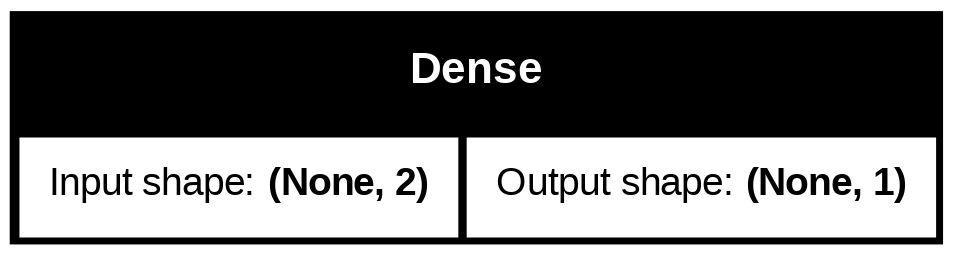

In [ ]:
from tensorflow.keras.utils import plot_model
# Visualize the model architecture and save it as an image
plot_model(model, to_file='model_architecture.png', show_shapes=True)